<a href="https://colab.research.google.com/github/ddarcy8/PythonProject2/blob/main/TEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing the dataset
import pandas as pd
import matplotlib.pyplot as plot
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv',)
df

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212326,84X717,Icahn Charter School,K-8,Living Environment,2016,8,s,s,s,s,s,s,s,na,na
212327,84X717,Icahn Charter School,K-8,Living Environment,2016,5,s,s,s,s,s,s,s,na,na
212328,84X717,Icahn Charter School,K-8,Living Environment,2017,6,s,s,s,s,s,s,s,na,na
212329,84X717,Icahn Charter School,K-8,Living Environment,2017,4,s,s,s,s,s,s,s,na,na


In [4]:
# renaming the columns to my liking
df.rename(columns={'School DBN': 'Schools by County', 'School Level': 'Grade Levels', 'Mean Score': 'Average Score'}, inplace=True)
df

,Schools by County,School Name,Grade Levels,Regents Exam,Year,Total Tested,Average Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212326,84X717,Icahn Charter School,K-8,Living Environment,2016,8,s,s,s,s,s,s,s,na,na
212327,84X717,Icahn Charter School,K-8,Living Environment,2016,5,s,s,s,s,s,s,s,na,na
212328,84X717,Icahn Charter School,K-8,Living Environment,2017,6,s,s,s,s,s,s,s,na,na
212329,84X717,Icahn Charter School,K-8,Living Environment,2017,4,s,s,s,s,s,s,s,na,na


In [5]:
# removing rows that contain the missing data of "s" and "na"
df = df[df['Average Score'].str.contains("s|na") == False]
df

df = df[df['Number Scoring CR'].str.contains("s|na") == False]
df

,Schools by County,School Name,Grade Levels,Regents Exam,Year,Total Tested,Average Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
8,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2015,49,78.4,1,2,48,98,23,46.9,48,98
9,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2016,51,79,9,17.6,42,82.4,33,64.7,40,78.4
10,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2017,51,84.8,0,0,51,100,44,86.3,50,98
12,01M188,P.S. 188 The Island School,K-8,Common Core Algebra,2015,23,62.9,14,60.9,9,39.1,0,0,2,8.7
13,01M188,P.S. 188 The Island School,K-8,Common Core Algebra,2016,22,69,6,27.3,16,72.7,2,9.1,15,68.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212311,84X706,Harriet Tubman Charter School,K-8,Common Core Algebra,2017,15,82.6,0,0,15,100,12,80,15,100
212320,84X717,Icahn Charter School,K-8,Common Core Algebra,2016,8,87.9,0,0,8,100,7,87.5,8,100
212321,84X717,Icahn Charter School,K-8,Common Core Algebra,2016,6,87.2,0,0,6,100,6,100,6,100
212322,84X717,Icahn Charter School,K-8,Common Core Algebra,2017,6,87,0,0,6,100,6,100,6,100


In [6]:
# Verifying that I don't have any null values left in my table
df.isnull().sum()

Schools by County              0
School Name                    0
Grade Levels                   0
Regents Exam                   8
Year                           0
Total Tested                   0
Average Score                  0
Number Scoring Below 65        0
Percent Scoring Below 65       0
Number Scoring 65 or Above     0
Percent Scoring 65 or Above    0
Number Scoring 80 or Above     0
Percent Scoring 80 or Above    0
Number Scoring CR              0
Percent Scoring CR             0
dtype: int64

In [7]:
# Looking at the datatypes of the columns
df.dtypes
# After 'Regents Exam', all column types are object.
# In order to perform statistics on them, I need to change the datatypes

Schools by County              object
School Name                    object
Grade Levels                   object
Regents Exam                   object
Year                            int64
Total Tested                    int64
Average Score                  object
Number Scoring Below 65        object
Percent Scoring Below 65       object
Number Scoring 65 or Above     object
Percent Scoring 65 or Above    object
Number Scoring 80 or Above     object
Percent Scoring 80 or Above    object
Number Scoring CR              object
Percent Scoring CR             object
dtype: object

In [8]:
# converting the data type for the columns between 'Average Score' and 'Percent Scoring CR' to a numeric datatype 
df['Average Score'] = pd.to_numeric(df['Average Score'], errors='coerce')
df['Number Scoring Below 65'] = pd.to_numeric(df['Number Scoring Below 65'], errors='coerce')
df['Percent Scoring Below 65'] = pd.to_numeric(df['Percent Scoring Below 65'], errors='coerce')
df['Number Scoring 65 or Above'] = pd.to_numeric(df['Number Scoring 65 or Above'], errors='coerce')
df['Percent Scoring 65 or Above'] = pd.to_numeric(df['Percent Scoring 65 or Above'], errors='coerce')
df['Number Scoring 80 or Above'] = pd.to_numeric(df['Number Scoring 80 or Above'], errors='coerce')
df['Percent Scoring 80 or Above'] = pd.to_numeric(df['Percent Scoring 80 or Above'], errors='coerce')
df['Number Scoring CR'] = pd.to_numeric(df['Number Scoring CR'], errors='coerce')
df['Percent Scoring CR'] = pd.to_numeric(df['Percent Scoring CR'], errors='coerce')

#Verifying the columns are a numeric type
df.dtypes

#Reviewing the summary statistics of the database now that they are all numeric
df.describe()

,Year,Total Tested,Average Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
count,69651.000000,69651.000000,69651.000000,69651.000000,69651.000000,69651.000000,69651.000000,69651.000000,69651.000000,69651.000000,69651.000000
mean,2015.899140,68.488722,65.021372,24.602777,43.188002,43.885946,56.813530,17.622331,20.139305,29.959340,36.213730
std,0.798549,105.435467,11.299210,37.663044,29.510014,82.915141,29.509804,52.379797,25.709290,68.306798,31.092605
min,2015.000000,6.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,16.000000,57.400000,5.000000,17.600000,7.000000,33.300000,0.000000,0.000000,2.000000,8.800000
50%,2016.000000,36.000000,64.700000,12.000000,41.100000,19.000000,58.900000,3.000000,9.100000,9.000000,29.000000
75%,2017.000000,78.000000,72.400000,29.000000,66.700000,49.000000,82.400000,14.000000,30.400000,31.000000,58.800000
max,2017.000000,1554.000000,98.300000,697.000000,100.000000,1497.000000,100.000000,1318.000000,100.000000,1465.000000,100.000000


In [25]:
# Reviewing the summary statistics for this school
# I chose this school since it has several different types of regents exams.
df[df['School Name'] == 'KIPP Academy Charter School'].describe()

,Year,Total Tested,Average Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,2015.869565,33.330435,70.487826,7.052174,27.420000,26.278261,72.583478,9.965217,24.347826,18.965217,49.713913
std,0.822083,23.379299,7.361721,5.648853,24.943755,22.390297,24.944974,13.522516,22.279951,19.387521,28.397149
min,2015.000000,6.000000,52.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,15.000000,66.900000,3.000000,7.600000,10.000000,66.700000,1.000000,5.750000,5.000000,25.800000
50%,2016.000000,27.000000,70.500000,6.000000,22.000000,19.000000,78.000000,4.000000,18.200000,13.000000,50.800000
75%,2017.000000,47.500000,76.200000,10.000000,33.300000,37.500000,92.400000,14.000000,40.000000,26.000000,76.050000
max,2017.000000,112.000000,85.100000,25.000000,100.000000,104.000000,100.000000,57.000000,73.300000,85.000000,100.000000


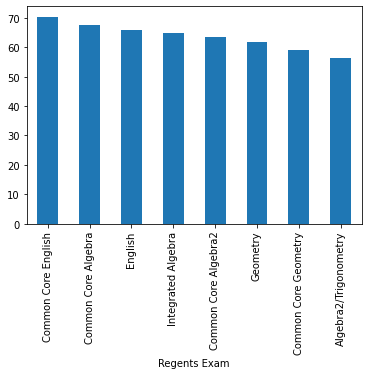

In [15]:
# Obtaining the citywide average scores by regent exam.
df.groupby(['Regents Exam'])['Average Score'].mean().sort_values(ascending=False).plot(kind="bar")
# The highest average score on a regent exam is the common core English exam.
#The lowest average score on a regent exam is the Algebra 2/Trigonometry exam.

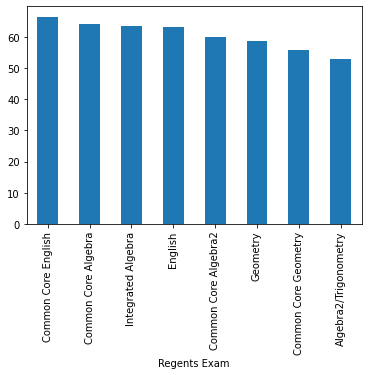

In [34]:
# Obtaining the Bronx average scores by regent exam.
df[df['Schools by County'].str.contains('X')].groupby(['Regents Exam'])['Average Score'].mean().sort_values(ascending=False).plot(kind="bar")
# The ranking of average score on regent exams is similar to the citywide average, but the averages are lower than the city.

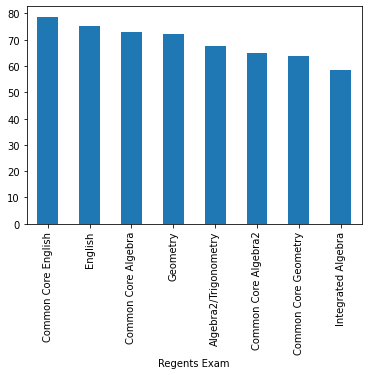

In [36]:
# Obtaining the average score for this school by regent exam
df[df['School Name'] == 'KIPP Academy Charter School'].groupby(['Regents Exam'])['Average Score'].mean().sort_values(ascending=False).plot(kind="bar")
# Like the city & the Bronx, the average highest score is on the Common Core English exam. KIPP's score is above the city and Bronx average
# Compared to the citywide and Bronx average, the ranking of English and Common Core Algebra is swapped at KIPP. That said, KIPP's scores are still above the city and Bronx.
# Integrated Algebra is the regent exam with the lowest scores at KIPP. Conversely, this is the exam with the third strongest scores citywide and in the borough.
# At KIPP, the English exams all rank higher than the math exams.

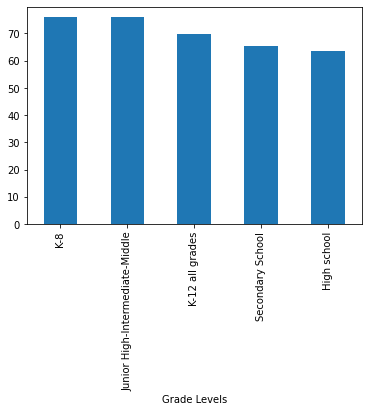

In [22]:
# Citywide regent exam average scores by grade level of school
df.groupby(['Grade Levels'])['Average Score'].mean().sort_values(ascending=False).plot(kind="bar")
# Citywide, regent exam scores are highest among lower grade levels and drops as the grade levels get higher

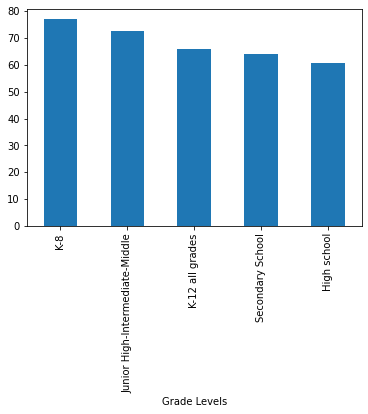

In [37]:
# Borough wide regent exam average scores by grade level of school
df[df['Schools by County'].str.contains('X')].groupby(['Grade Levels'])['Average Score'].mean().sort_values(ascending=False).plot(kind="bar")
# The Bronx bar charts mirror the order of the citywide charts, although the average scores are slightly lower

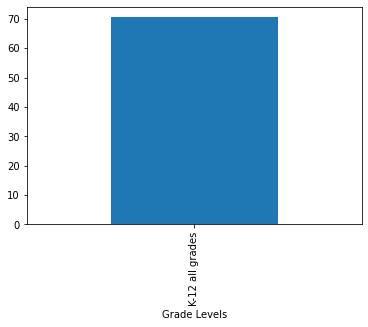

In [24]:
# KIPP's average score on regent exams schoolwide
df[df['School Name'] == 'KIPP Academy Charter School'].groupby(['Grade Levels'])['Average Score'].mean().sort_values(ascending=False).plot(kind="bar")
# KIPP's average score for regent exams is slightly higher than the city-wide and borough average for K-12 schools.
# While the dataset doesn't specify this, one can infer based on the citywide and borough data that average scores are likely inversely proportional with grade level

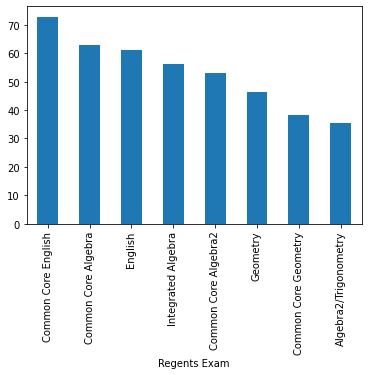

In [27]:
# Percent of test takers citywide that score above 65 by regent exam
df.groupby(['Regents Exam'])['Percent Scoring 65 or Above'].mean().sort_values(ascending=False).plot(kind="bar")
# Over 70% of test takers score higher than a 65 on the Common Core English exam. This is the highest percent.
# Citywide, less than 40% of test takers score higher than a 65 on the Algebra 2/Trigonometry regent exam.
# The citywide ranking of regent exams for this metric aligns nicely with the citywide ranking of average score on a regent exam.

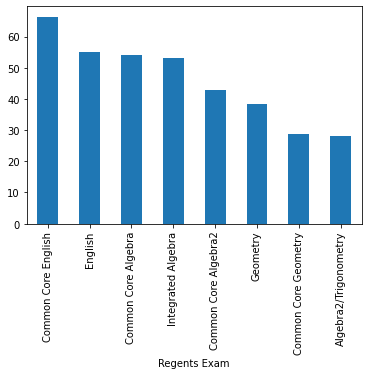

In [38]:
# Percent of test takers in the Bronx that score above 65 by regent exam
df[df['Schools by County'].str.contains('X')].groupby(['Regents Exam'])['Percent Scoring 65 or Above'].mean().sort_values(ascending=False).plot(kind="bar")
# In the Bronx, test takers are more likely to score above a 65 on English exams than on Math exams
# Students in the Bronx are less likely to score above a 65 on these Regents exams than students citywide are.

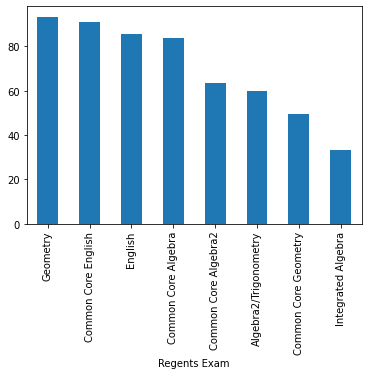

In [29]:
# Percent of KIPP test takers that score above 65 by regent exam
df[df['School Name'] == 'KIPP Academy Charter School'].groupby(['Regents Exam'])['Percent Scoring 65 or Above'].mean().sort_values(ascending=False).plot(kind="bar")
# In a departure from the ranking of average scores, geometry is the exam that has the highest percent of students score above 65
# At KIPP, test takers score above a 65 on most exams
# At KIPP, only about about one-third of takers score above a 65 on Integrated Algebra, the lowest of any exam at the school
# # While KIPP students are more likely to score above a 65 on a regent exam compared to another student in the Bronx or the city, they are far less likely to score above a 65 on the Integrated Algebra exam compared to their peers in the borough and the city

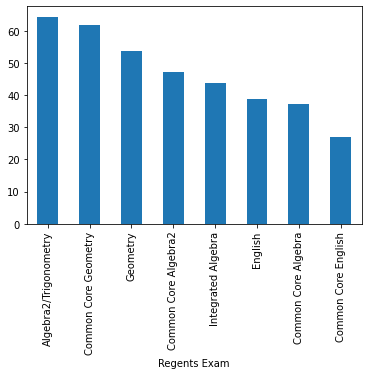

In [30]:
# Obtaining the percent of test takers that score below 65 city-wide
df.groupby(['Regents Exam'])['Percent Scoring Below 65'].mean().sort_values(ascending=False).plot(kind="bar")
# As you would expect, the rankings of test with students scoring below 65 is the inverse of the students scoring above 65
# Citywide, nearly two-thirds of students score below 65 in Algebra 2/Trigonometry and Common Core Geometry

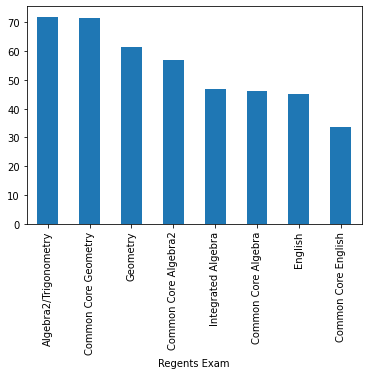

In [39]:
# Obtaining the percent of test takers that score below 65 in the Bronx
df[df['Schools by County'].str.contains('X')].groupby(['Regents Exam'])['Percent Scoring Below 65'].mean().sort_values(ascending=False).plot(kind="bar")
# A greater percent of students in the Bronx score below a 65 on Regents Exams than do citywide.
# Most Bronx testakers score below a 65 on Algebra, Trigonometry, and Geometry exams

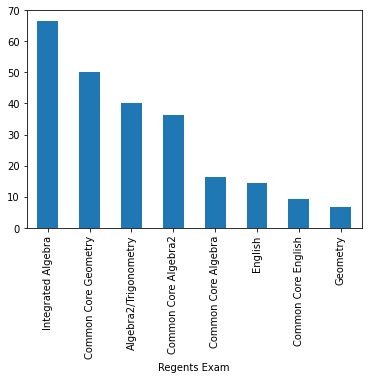

In [31]:
# Obtaining the percent of test takers that score below 65 at KIPP
df[df['School Name'] == 'KIPP Academy Charter School'].groupby(['Regents Exam'])['Percent Scoring Below 65'].mean().sort_values(ascending=False).plot(kind="bar")
# KIPP students perform significantly worse on the integrated exam than their city-wide and borough peers do. Two-thirds of KIPP students score below a 65 while most score above 65 citywide and in the Bronx.
# Conversley, KIPP students perform significantly better on the geometry exam than their city-wide peers do. Less than 10% of KIPP students score below 65 while most students citywide and in the Bronx score below 65.